In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('1-studyhours.csv')

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


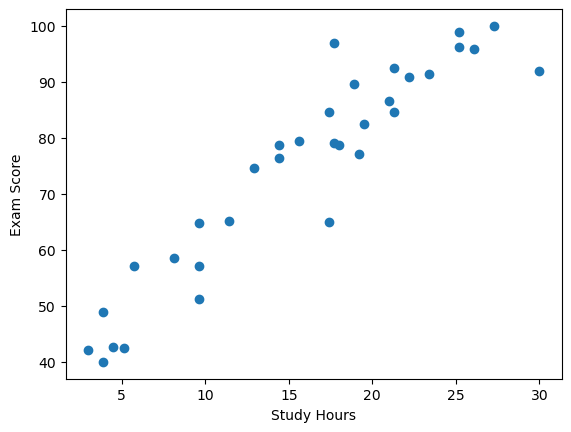

In [4]:
plt.scatter(df['Study Hours'],df['Exam Score'])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [5]:
## independent and dependent features
X=df[['Study Hours']] # X = df['Study Hours']
y=df['Exam Score']

In [6]:
type(X)

pandas.core.frame.DataFrame

In [7]:
type(y)

pandas.core.series.Series

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)

In [10]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [11]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [12]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler   #burada ise tum sayilari birbirine yakin tutacagiz ki train sirasinda cok atlamasin diye.

In [13]:
scaler=StandardScaler()

In [14]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

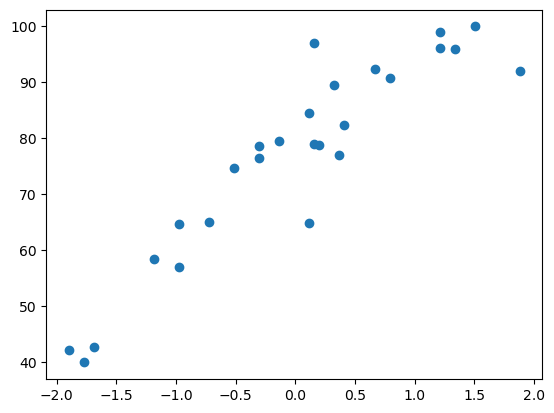

In [15]:
plt.scatter(X_train,y_train)
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression   # burada cizgiyi cekmeye basliyoruz. 

In [17]:
regression = LinearRegression()

In [18]:
regression.fit(X_train,y_train)

LinearRegression()

In [19]:
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient :  [16.17860223]
Intercept :  76.9076923076923


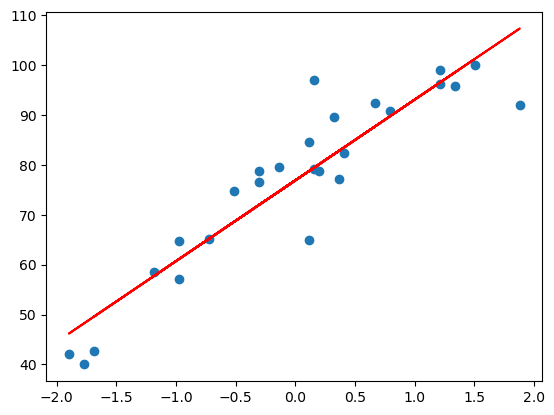

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r")
plt.show()

In [21]:
# y = 76.91 + 16.18 x      # anlami hic calismayan 76,91 aliyor. bir saat extra calisan 93 civarlarinda bir puan aliyor.

In [22]:
# prediction with test data

In [23]:
y_pred_test=regression.predict(X_test)

In [24]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

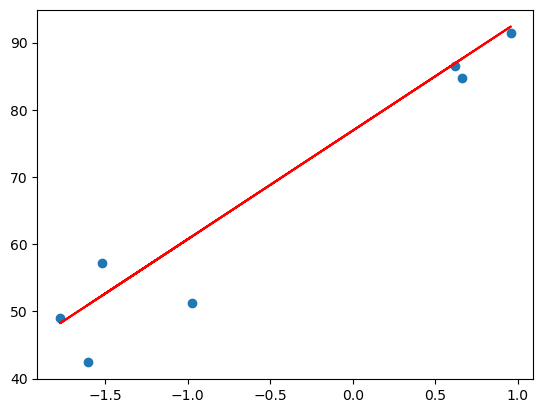

In [25]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),"r")
plt.show()

In [26]:
### Performance metrics

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

29.45839048833392
4.054868128856142
5.427558427906043


In [28]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [29]:
score

0.9196596206825491

In [30]:
#adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.903591544819059

In [31]:
# new data

In [32]:
scaler.transform([[20]])    

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [33]:
regression.predict(scaler.transform([[20]]))  # burada mesela 20 saat calisan alacagi puan 84 kusur

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [34]:
regression.predict(scaler.transform([[5]]))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([50.72485871])

In [35]:
regression.predict(scaler.transform([[1]]))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([41.66324575])

In [36]:
regression.predict(scaler.transform([[25]]))

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.0329235])